# 노래방 데이터와 그래프, 음원사재기 관심도
* 3-3-2. 신규 진입한 음원 소셜미디어 관심도(주 단위 그래프)
    * naver_datalab/{site_name}/{title}_{artist}.xlsx
    * naver_datalab/{site_name}/{title}_{artist}.png
    * kakao_trend/{site_name}/{title}_{artist}.xls
    * kakao_trend/{site_name}/{title}_{artist}.png
    * google_trend/{site_name}/{title}_{artist}.csv(일 단위 그래프)
    * google_trend/{site_name}/{title}_{artist}.png(일 단위 그래프)
* 2-2. 주간 음원 모니터링 결과(음원 사재기 검색 비율)
    * naver_datalab/음원 사재기.xlsx
    * naver_datalab/음원 사재기.png
    * kakao_trend/음원 사재기.xls
    * kakao_trend/음원 사재기.png
* 5-1-1. 음원사재기 관심도 분석
    * naver_datalab/음원 사재기.xlsx
    * naver_datalab/음원 사재기.png
    * kakao_trend/음원 사재기.xls
    * kakao_trend/음원 사재기.png
* 이슈
    * 그래프 x축 지정해야 함(그래프 x축 설정). 원 데이터에서 날짜로 나오기에 직접 지정.

## 라이브러리

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, math

In [43]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [44]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에서 음수 표현 가능하도록 설정.

In [45]:
from selenium import webdriver
import chromedriver_autoinstaller as ca
from selenium.webdriver.common.keys import Keys
import random, time

In [46]:
import shutil

## 이번주 기간 설정

In [47]:
# 기간 설정
start_date = '2022-05-23'
end_date = '2022-05-29'

## 3-3-2. 신규 진입한 음원 소셜미디어 관심도

In [48]:
f_path = 'c:/data/Wantreez/Crawling/music'
try:
    os.chdir(f_path)
except:
    pass

In [49]:
code_path = os.getcwd().replace('\\', '/')
code_path

'c:/data/Wantreez/Crawling/music'

### 그래프 x축 설정

In [50]:
# 그래프 x 축 설정
xticks_names = ['5월1주차', '5월2주차', '5월3주차', '5월4주차']

### 네이버 데이터 랩 데이터, 그래프

#### 다운로드 폴더 설정

In [76]:
# 다운로드 폴더 설정
down_folder = 'C:/Users/kbjung/Downloads/'
down_xlsx = 'datalab.xlsx'

In [77]:
ca.install(True)
driver = webdriver.Chrome()

In [79]:
site_list = ['ky', 'tj']
for site_name in site_list:
    save_folder = f'crawled_data/outlier_data/{start_date}_{end_date}'
    save_folder2 = os.path.join(code_path, save_folder)
    file_name = f'[{site_name}]{start_date}_{end_date}_pop_df.xlsx'
    save_path = os.path.join(save_folder2, file_name)
    df = pd.read_excel(save_path)
    # 파일 저장 폴더 생성
    naver_datalab_path = f'crawled_data/outlier_data/{start_date}_{end_date}/naver_datalab/{site_name}'
    des = os.path.join(code_path, naver_datalab_path)
    os.makedirs(des, exist_ok=True)

    # 네이버 데이터 랩 검색
    for i in range(df.shape[0]):
        # 네이버 데이터 랩 접속
        url = 'https://datalab.naver.com/keyword/trendSearch.naver'
        driver.get(url)
        driver.implicitly_wait(3)
        time.sleep( random.uniform(1, 1.5) )
        driver.maximize_window()

        # 검색어 입력
        word = df['곡'][i]
        search_box = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[1]/div[1]/input')
        search_box.clear()
        time.sleep( random.uniform(1, 1.5) )
        search_box.send_keys(word)

        # 1개월 picker 클릭
        time_picker = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/label[2]').click()
        time.sleep( random.uniform(1, 1.5) )

        # 주간 클릭
        week_picker = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/div').click()
        time.sleep( random.uniform(0.5, 1) )
        week_button = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/div/ul/li[2]').click()
        time.sleep( random.uniform(0.5, 1) )

        # 검색 버튼 클릭
        search_button = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/a/span').click()
        time.sleep( random.uniform(1, 1.5) )
        driver.implicitly_wait(3)

        # 다운 버튼 클릭
        down_button = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div/div[1]/div[1]/div[1]/div/div/div/div/div/div[1]/div[4]/a').click()
        time.sleep( random.uniform(1, 1.5) )

        # 파일 이름 변경
        title = df['곡'][i]
        artist = df['가수'][i]
        new_down_xlsx = f'{title}_{artist}.xlsx'
        os.rename(down_folder + down_xlsx, down_folder + new_down_xlsx)

        # 파일 이동
        new_down_path = os.path.join(des, new_down_xlsx)
        shutil.move(down_folder + new_down_xlsx, new_down_path)
        print(f'{new_down_xlsx} 완료.')
    print(f'{site_name} 신규 진입 음원 소셜 검색 비율 파일 다운 완료.')

    file_list = os.listdir(des)
    # 그래프 생성
    for one in file_list:
        title = one.split('_')[0]
        artist = one.split('_')[1].split('.')[0]
        two = one.split('_')[1].split('.')
        if len(two) > 2:
            temp = one.split('_')[1].replace('.', '[point]', len(two) - 2)
            artist = temp.split('.')[0].replace('[point]', '.')
            
        one_path = os.path.join(des, one)
        temp = pd.read_excel(one_path)
        temp = temp.reset_index(drop=True)
        temp = temp.iloc[6:, :].reset_index(drop=True)
        temp.columns = ['날짜', '검색비율']

        date_list = pd.date_range(end=start_date, periods=4, freq='W-MON')
        start_week = str(date_list[0]).split(' ')[0]
        end_week = str(date_list[-1]).split(' ')[0]
        week_temp = temp[ (temp['날짜'] >= start_week) & (temp['날짜'] <= end_week)].reset_index(drop=True)
        week_temp['검색비율'] = week_temp['검색비율'].astype(float)
        week_temp['검색비율'] = round(week_temp['검색비율'], 1)
        
        colors = sns.color_palette('YlGn', week_temp.shape[0])
        x = xticks_names
        y = week_temp['검색비율']
        try:
            interval_ratio = math.ceil( max(y) )*0.05
            interval_ratio2 = math.ceil( max(y) )*0.2
            plt.figure( figsize=(12,8) )
            plt.grid(axis='y')
            plt.bar(x, y, color=colors, width=0.5)
            plt.title(f"네이버 데이터 랩 검색 비율\n{title}-{artist}", fontsize=20)
            plt.xticks(xticks_names ,fontsize=15)
            plt.yticks(fontsize=15)
            for i in range( len(y) ):
                    if y[i] <= interval_ratio2:
                        plt.text(x[i], y[i]+interval_ratio, round(y[i],1), fontsize=15, color='black', horizontalalignment='center', verticalalignment='bottom')
                    else:
                        plt.text(x[i], y[i]-interval_ratio, round(y[i],1), fontsize=15, color='black', horizontalalignment='center', verticalalignment='top')
            file_name = f'{title}_{artist}.png'
            save_img_path = os.path.join(des, file_name)
            plt.savefig(save_img_path, bbox_inches='tight')
            print(f'{file_name} 저장 완료.')
            plt.close()
        except:
            pass
    print(f'{site_name} 데이터, 그래프 저장 완료.')
    print()

C:\Users\kbjung\AppData\Local\Temp/ipykernel_2292/4004512646.py:24: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  search_box = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[1]/div[1]/input')
C:\Users\kbjung\AppData\Local\Temp/ipykernel_2292/4004512646.py:30: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  time_picker = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/label[2]').click()
C:\Users\kbjung\AppData\Local\Temp/ipykernel_2292/4004512646.py:34: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  week_picker = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/div').click()
C:\Users\kbjung

TOMBOY_(여자)아이들.xlsx 완료.
잘못된 만남_김건모.xlsx 완료.
ky 신규 진입 음원 소셜 검색 비율 파일 다운 완료.
TOMBOY_(여자)아이들.png 저장 완료.
잘못된 만남_김건모.png 저장 완료.
ky 데이터, 그래프 저장 완료.

That That_싸이(Prod & Feat. SUGA of BTS).xlsx 완료.
Monologue_버즈.xlsx 완료.
열애중_벤(Ben).xlsx 완료.
사랑했었다(Still Love You)_이홍기,유회승.xlsx 완료.
인연(동녘바람)_이선희.xlsx 완료.
죽일놈(Guilty)_다이나믹듀오.xlsx 완료.
tj 신규 진입 음원 소셜 검색 비율 파일 다운 완료.
Monologue_버즈.png 저장 완료.
That That_싸이(Prod & Feat. SUGA of BTS).png 저장 완료.
사랑했었다(Still Love You)_이홍기,유회승.png 저장 완료.
열애중_벤(Ben).png 저장 완료.
인연(동녘바람)_이선희.png 저장 완료.
죽일놈(Guilty)_다이나믹듀오.png 저장 완료.
tj 데이터, 그래프 저장 완료.



In [80]:
# driver.quit()

### 카카오 트랜드 데이터, 그래프

#### 다운로드 폴더 설정

In [81]:
# 다운로드 폴더, 파일 이름 설정
down_folder = 'C:/Users/kbjung/Downloads/'
down_xls = 'datatrend.xls'

In [82]:
# ca.install(True)
# driver = webdriver.Chrome()

In [83]:
site_list = ['ky', 'tj']
for site_name in site_list:
    save_folder = f'crawled_data/outlier_data/{start_date}_{end_date}'
    save_folder2 = os.path.join(code_path, save_folder)
    file_name = f'[{site_name}]{start_date}_{end_date}_pop_df.xlsx'
    save_path = os.path.join(save_folder2, file_name)
    df = pd.read_excel(save_path)
    # 파일 저장 폴더 생성
    kakao_trend_path = f'crawled_data/outlier_data/{start_date}_{end_date}/kakao_trend/{site_name}'
    des = os.path.join(code_path, kakao_trend_path)
    os.makedirs(des, exist_ok=True)

    # 카카오 트랜드 검색
    for i in range(df.shape[0]):
        # 카카오 트랜드 접속
        url = 'https://datatrend.kakao.com/'
        driver.get(url)
        driver.implicitly_wait(3)
        time.sleep( random.uniform(1, 1.5) )
        driver.maximize_window()

        # 검색어 입력
        word = df['곡'][i]
        search_box = driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[1]/div/input')
        search_box.clear()
        time.sleep( random.uniform(1, 1.5) )
        search_box.send_keys(word)

        # 1개월 picker 클릭
        driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[3]/div[2]/div[1]/div[2]/label[2]/span').click()
        time.sleep( random.uniform(1, 1.5) )

        # 기준 주간 클릭
        driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[3]/div[2]/div[2]/div[2]/button').click()
        time.sleep( random.uniform(1, 1.5) )
        driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[3]/div[2]/div[2]/div[2]/ul/li[2]/label/span').click()
        time.sleep( random.uniform(1, 1.5) )


        # 검색 버튼 클릭
        driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[4]/button[2]').click()
        time.sleep( random.uniform(1, 1.5) )
        driver.implicitly_wait(3)
        try:
            # 다운 버튼 클릭
            driver.find_element_by_xpath('/html/body/div/div/header/div/div/a[2]').click()
            time.sleep( random.uniform(1, 1.5) )

            # 파일 이름 변경
            title = df['곡'][i]
            artist = df['가수'][i]
            new_down_xls = f'{title}_{artist}.xls'
            os.rename(down_folder + down_xls, down_folder + new_down_xls)

            # 파일 이동
            new_down_path = os.path.join(des, new_down_xls)
            shutil.move(down_folder + new_down_xls, new_down_path)
            print(f'{new_down_xls} 완료.')
        except:
            pass
    print('수집 완료.')

    outlier_file_list = os.listdir(des)
    for one in outlier_file_list:
        title = one.split('_')[0]
        artist = one.split('_')[1].split('.')[0]
        two = one.split('_')[1].split('.')
        if len(two) > 2:
            temp = one.split('_')[1].replace('.', '[point]', len(two) - 2)
            artist = temp.split('.')[0].replace('[point]', '.')
            
        one_path = os.path.join(des, one)
        temp = pd.read_excel(one_path).reset_index(drop=True)
        temp = temp.iloc[7:38, :].reset_index(drop=True)
        temp.columns = ['날짜', '검색비율']
        temp['날짜'] = temp['날짜'].astype(str)
        temp['날짜'] = temp['날짜'].apply([lambda x: x.split(' ')[0]])
        date_list = pd.date_range(end=start_date, periods=4, freq='W-MON')
        start_week = str(date_list[0]).split(' ')[0]
        end_week = str(date_list[-1]).split(' ')[0]
        week_temp = temp[ (temp['날짜'] >= start_week) & (temp['날짜'] <= end_week)].reset_index(drop=True)
        week_temp['검색비율'] = week_temp['검색비율'].astype(int)
        
        colors = sns.color_palette('YlOrRd', week_temp.shape[0])
        x = xticks_names
        y = week_temp['검색비율']
        try:
            interval_ratio = math.ceil( max(y) )*0.05
            interval_ratio2 = math.ceil( max(y) )*0.2
            plt.figure( figsize=(12,8) )
            plt.grid(axis='y')
            plt.bar(x, y, color=colors, width=0.5)
            plt.title(f"카카오 트랜드 검색 비율\n{title}-{artist}", fontsize=20)
            plt.xticks(xticks_names, fontsize=15)
            plt.yticks(fontsize=15)
            for i in range( len(y) ):
                    if y[i] <= interval_ratio2:
                            plt.text(x[i], y[i]+interval_ratio, round(y[i],1), fontsize=15, color='black', horizontalalignment='center', verticalalignment='bottom')
                    else:
                            plt.text(x[i], y[i]-interval_ratio, round(y[i],1), fontsize=15, color='black', horizontalalignment='center', verticalalignment='top')
            file_name2 = f'{title}_{artist}.png'
            save_img_path = os.path.join(des, file_name2)
            plt.savefig(save_img_path)
            plt.close()
            print(f'{file_name2} 저장 완료.')
        except:
            pass
    print(f'{site_name} 데이터, 그래프 저장 완료.')
    print()

C:\Users\kbjung\AppData\Local\Temp/ipykernel_2292/1236985894.py:24: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  search_box = driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[1]/div/input')
C:\Users\kbjung\AppData\Local\Temp/ipykernel_2292/1236985894.py:30: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[3]/div[2]/div[1]/div[2]/label[2]/span').click()
C:\Users\kbjung\AppData\Local\Temp/ipykernel_2292/1236985894.py:34: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[3]/div[2]/div[2]/div[2]/button').click()
C:\Users\kbjung\AppData\Local\Temp/ipykernel_2292/1236985894.py:36: DeprecationWarning: find_element_by_xpath is depre

TOMBOY_(여자)아이들.xls 완료.
잘못된 만남_김건모.xls 완료.
수집 완료.
TOMBOY_(여자)아이들.png 저장 완료.
잘못된 만남_김건모.png 저장 완료.
ky 데이터, 그래프 저장 완료.

That That_싸이(Prod & Feat. SUGA of BTS).xls 완료.
Monologue_버즈.xls 완료.
열애중_벤(Ben).xls 완료.
수집 완료.
Monologue_버즈.png 저장 완료.
That That_싸이(Prod & Feat. SUGA of BTS).png 저장 완료.
열애중_벤(Ben).png 저장 완료.
tj 데이터, 그래프 저장 완료.



In [ ]:
# driver.quit()

### 구글 트랜드 데이터, 그래프

#### 다운로드 폴더 설정

In [ ]:
# 다운로드 폴더, 파일 이름 설정
down_folder = 'C:/Users/kbjung/Downloads/'
down_csv = 'multiTimeline.csv'

In [ ]:
# ca.install(True)
# driver = webdriver.Chrome()

In [ ]:
for site_name in site_list:
    save_folder = f'crawled_data/outlier_data/{start_date}_{end_date}'
    save_folder2 = os.path.join(code_path, save_folder)
    file_name = f'[{site_name}]{start_date}_{end_date}_pop_df.xlsx'
    save_path = os.path.join(save_folder2, file_name)
    df = pd.read_excel(save_path)
    # 파일 저장 폴더 생성
    google_trend_path = f'crawled_data/outlier_data/{start_date}_{end_date}/google_trend/{site_name}'
    des = os.path.join(code_path, google_trend_path)
    os.makedirs(des, exist_ok=True)

    # 구글 트랜드 검색
    for i in range(df.shape[0]):
        # 구글 트렌트 접속
        url = 'https://trends.google.co.kr/trends/?geo=KR'
        driver.get(url)
        driver.implicitly_wait(3)
        time.sleep( random.uniform(1, 1.5) )
        driver.maximize_window()

        # 검색어 입력
        word = df['곡'][i]
        search_box = driver.find_element_by_xpath('/html/body/div[3]/div[2]/div/ng-include/div/div[2]/autocomplete/md-autocomplete/md-autocomplete-wrap/input')
        search_box.clear()
        time.sleep( random.uniform(1, 1.5) )
        search_box.send_keys(word)
        time.sleep( random.uniform(1, 1.5) )
        search_box.send_keys(Keys.ENTER)
        time.sleep( random.uniform(1, 1.5) )
        driver.implicitly_wait(3)

        # 날짜 picker 클릭
        
        time_picker = driver.find_element_by_xpath('/html/body/div[3]/div[2]/div/header/div/div[3]/ng-transclude/div[2]/div/div/custom-date-picker/ng-include/md-select').click()
        time.sleep( random.uniform(1, 1.5) )
        # 30일 날짜 선택
        time_picker_30day = driver.find_element_by_xpath('/html/body/div[7]/md-select-menu/md-content/md-option[6]').click()
        time.sleep( random.uniform(1, 1.5) )
        # 파일 다운 버튼 클릭
        down_button = driver.find_element_by_xpath('/html/body/div[3]/div[2]/div/md-content/div/div/div[1]/trends-widget/ng-include/widget/div/div/div/widget-actions/div/button[1]').click()
        time.sleep( random.uniform(1, 1.5) )

        # 파일 이름 변경
        title = df['곡'][i]
        artist = df['가수'][i]
        new_down_csv = f'{title}_{artist}.csv'
        os.rename(down_folder + down_csv, down_folder + new_down_csv)

        # 파일 이동
        new_down_path = os.path.join(des, new_down_csv)
        shutil.move(down_folder + new_down_csv, new_down_path)
        print(f'{new_down_csv} 완료.')

    outlier_file_list = os.listdir(des)
    for one in outlier_file_list:
        title = one.split('_')[0]
        artist = one.split('_')[1].split('.')[0]
        one_path = os.path.join(des, one)
        temp = pd.read_csv(one_path).reset_index()
        temp = temp.iloc[1:, :].reset_index(drop=True)
        temp.columns = ['날짜', '검색비율']

        week_temp = temp[ (temp['날짜'] >= start_date) & (temp['날짜'] <= end_date)].reset_index(drop=True)
        week_temp['검색비율'] = week_temp['검색비율'].astype(int)

        colors = sns.color_palette('RdPu', week_temp.shape[0])
        x = week_temp['날짜']
        y = week_temp['검색비율']
        try:
            interval_ratio = math.ceil( max(y) )*0.05
            interval_ratio2 = math.ceil( max(y) )*0.2
            plt.figure( figsize=(12,8) )
            plt.bar(x, y, color=colors)
            plt.title(f"구글 트랜드 검색 비율\n{title}-{artist}", fontsize=20)
            plt.xticks(fontsize=15, rotation=45)
            plt.yticks(fontsize=15)
            for i in range( len(y) ):
                    if y[i] <= interval_ratio2:
                        plt.text(x[i], y[i]+interval_ratio, round(y[i],1), fontsize=15, color='black', horizontalalignment='center', verticalalignment='bottom')
                    else:
                        plt.text(x[i], y[i]-interval_ratio, round(y[i],1), fontsize=15, color='black', horizontalalignment='center', verticalalignment='top')
            
            file_name2 = f'{title}_{artist}.png'
            save_img_path = os.path.join(des, file_name2)
            plt.savefig(save_img_path)
            plt.close()
            print(f'{file_name2} 저장 완료.')
        except:
            pass

C:\Users\kbjung\AppData\Local\Temp/ipykernel_2292/1789163386.py:23: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  search_box = driver.find_element_by_xpath('/html/body/div[3]/div[2]/div/ng-include/div/div[2]/autocomplete/md-autocomplete/md-autocomplete-wrap/input')
C:\Users\kbjung\AppData\Local\Temp/ipykernel_2292/1789163386.py:34: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  time_picker = driver.find_element_by_xpath('/html/body/div[3]/div[2]/div/header/div/div[3]/ng-transclude/div[2]/div/div/custom-date-picker/ng-include/md-select').click()
C:\Users\kbjung\AppData\Local\Temp/ipykernel_2292/1789163386.py:37: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  time_picker_30day = driver.find_element_by_xpath('/html/body/div[7]/md-select-menu/md-content/md-option[6]').click()
C:\Use

TOMBOY_(여자)아이들.csv 완료.
잘못된 만남_김건모.csv 완료.
TOMBOY_(여자)아이들.png 저장 완료.
잘못된 만남_김건모.png 저장 완료.
That That_싸이(Prod & Feat. SUGA of BTS).csv 완료.
Monologue_버즈.csv 완료.
열애중_벤(Ben).csv 완료.
사랑했었다(Still Love You)_이홍기,유회승.csv 완료.
인연(동녘바람)_이선희.csv 완료.
죽일놈(Guilty)_다이나믹듀오.csv 완료.
Monologue_버즈.png 저장 완료.
That That_싸이(Prod & Feat.png 저장 완료.
열애중_벤(Ben).png 저장 완료.


In [62]:
# driver.quit()

## 2-2. 주간 음원 모니터링 결과(음원 사재기 검색 비율)
## & 5-1-1. 음원사재기 관심도 분석

In [63]:
# 다운로드 폴더 설정
down_folder = 'C:/Users/kbjung/Downloads/'
down_xlsx = 'datalab.xlsx'

### 그래프 x축 설정2

In [64]:
# 그래프 x축 설정
xticks_names2 = ['5월3주차', '5월4주차']

### 네이버 데이터 랩

In [65]:
# 파일 저장 폴더 생성
naver_datalab_path = f'crawled_data/outlier_data/{start_date}_{end_date}/naver_datalab'
des2 = os.path.join(code_path, naver_datalab_path)
os.makedirs(des2, exist_ok=True)

In [66]:
# ca.install(True)
# driver = webdriver.Chrome()

#### 엑셀 출력

In [67]:
# 네이버 데이터 랩 검색
url = 'https://datalab.naver.com/keyword/trendSearch.naver'
driver.get(url)
driver.implicitly_wait(3)
time.sleep( random.uniform(1, 1.5) )
driver.maximize_window()

# 검색어 입력
word = '음원 사재기'
search_box = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[1]/div[1]/input')
search_box.clear()
time.sleep( random.uniform(1, 1.5) )
search_box.send_keys(word)

# 3개월 picker 클릭
time_picker = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/label[3]').click()
time.sleep( random.uniform(1, 1.5) )

# 주간 클릭
week_picker = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/div').click()
time.sleep( random.uniform(0.5, 1) )
week_button = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/div/ul/li[2]').click()
time.sleep( random.uniform(0.5, 1) )

# 검색 버튼 클릭
search_button = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/a/span').click()
time.sleep( random.uniform(1, 1.5) )
driver.implicitly_wait(3)

# 다운 버튼 클릭
down_button = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div/div[1]/div[1]/div[1]/div/div/div/div/div/div[1]/div[4]/a').click()
time.sleep( random.uniform(1, 1.5) )

# 파일 이름 변경
new_down_xlsx = f'{word}.xlsx'
os.rename(down_folder + down_xlsx, down_folder + new_down_xlsx)

# 파일 이동
new_down_path2 = os.path.join(des2, new_down_xlsx)
shutil.move(down_folder + new_down_xlsx, new_down_path2)
print(f'{new_down_xlsx} 완료.')

C:\Users\kbjung\AppData\Local\Temp/ipykernel_2292/1249822867.py:10: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  search_box = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[1]/div[1]/input')
C:\Users\kbjung\AppData\Local\Temp/ipykernel_2292/1249822867.py:16: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  time_picker = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/label[3]').click()
C:\Users\kbjung\AppData\Local\Temp/ipykernel_2292/1249822867.py:20: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  week_picker = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/div').click()
C:\Users\kbjung

음원 사재기.xlsx 완료.


In [68]:
# driver.quit()

#### 그래프 출력

음원 사재기.png 저장 완료.


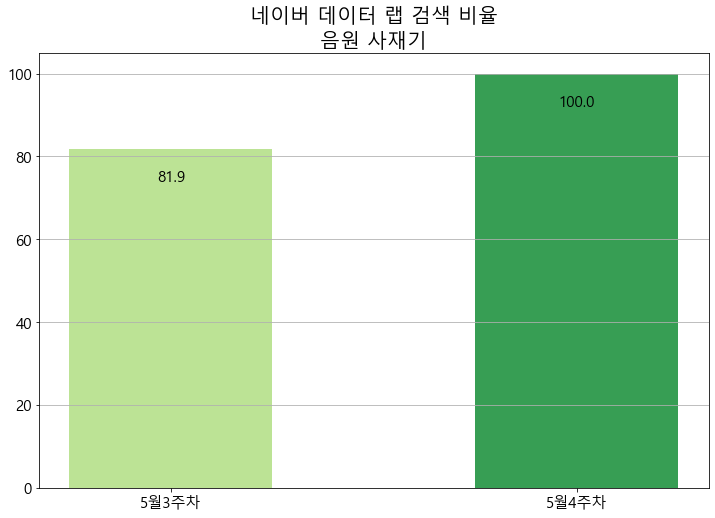

In [69]:
# 그래프 생성
file_list = os.listdir(des2)
for one in file_list:
    if '음원 사재기.xlsx' in one:
        one_path2 = os.path.join(des2, one)
        temp = pd.read_excel(one_path2)
        temp = temp.reset_index(drop=True)
        temp = temp.iloc[6:, :]
        temp = temp.reset_index(drop=True)
        temp.columns = ['날짜', '검색비율']

        date_list = pd.date_range(end=start_date, periods=2, freq='W-MON')
        start_week = str(date_list[0]).split(' ')[0]
        end_week = str(date_list[-1]).split(' ')[0]
        week_temp = temp[ (temp['날짜'] >= start_week) & (temp['날짜'] <= end_week)].reset_index(drop=True)
        week_temp['검색비율'] = week_temp['검색비율'].astype(float)
        week_temp['검색비율'] = round(week_temp['검색비율'], 1)
        
        colors = sns.color_palette('YlGn', week_temp.shape[0])
        x = xticks_names2
        y = week_temp['검색비율']
        try:
            interval_ratio = math.ceil( max(y) )*0.05
            interval_ratio2 = math.ceil( max(y) )*0.2
            plt.figure( figsize=(12,8) )
            plt.grid(axis='y')
            plt.bar(x, y, color=colors, width=0.5)
            plt.title(f"네이버 데이터 랩 검색 비율\n{word}", fontsize=20)
            plt.xticks(xticks_names2 ,fontsize=15)
            plt.yticks(fontsize=15)
            for i in range( len(y) ):
                    if y[i] <= interval_ratio2:
                        plt.text(x[i], y[i]+interval_ratio, round(y[i],1), fontsize=15, color='black', horizontalalignment='center', verticalalignment='bottom')
                    else:
                        plt.text(x[i], y[i]-interval_ratio, round(y[i],1), fontsize=15, color='black', horizontalalignment='center', verticalalignment='top')
            file_name2 = f'{word}.png'
            save_img_path2 = os.path.join(des2, file_name2)
            plt.savefig(save_img_path2)
            print(f'{file_name2} 저장 완료.')
        except:
            pass    

### 카카오 트랜드

In [70]:
# 다운로드 폴더, 파일 이름 설정
down_folder = 'C:/Users/kbjung/Downloads/'
down_xlsx = 'datatrend.xls'

In [71]:
# 파일 저장 폴더 생성
kakao_trend_path = f'crawled_data/outlier_data/{start_date}_{end_date}/kakao_trend'
des3 = os.path.join(code_path, kakao_trend_path)
os.makedirs(des3, exist_ok=True)

In [72]:
# ca.install(True)
# driver = webdriver.Chrome()

#### 엑셀 출력

In [73]:
# 카카오 트랜드 접속
url = 'https://datatrend.kakao.com/'
driver.get(url)
driver.implicitly_wait(3)
time.sleep( random.uniform(1, 1.5) )
driver.maximize_window()

# 검색어 입력
word = '음원 사재기'
search_box = driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[1]/div/input')
search_box.clear()
time.sleep( random.uniform(1, 1.5) )
search_box.send_keys(word)

# 1개월 picker 클릭
driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[3]/div[2]/div[1]/div[2]/label[2]/span').click()
time.sleep( random.uniform(1, 1.5) )

# 기준 주간 클릭
driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[3]/div[2]/div[2]/div[2]/button').click()
time.sleep( random.uniform(1, 1.5) )
driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[3]/div[2]/div[2]/div[2]/ul/li[2]/label/span').click()
time.sleep( random.uniform(1, 1.5) )


# 검색 버튼 클릭
driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[4]/button[2]').click()
time.sleep( random.uniform(1, 1.5) )
driver.implicitly_wait(3)

# 다운 버튼 클릭
driver.find_element_by_xpath('/html/body/div/div/header/div/div/a[2]').click()
time.sleep( random.uniform(1, 1.5) )

# 파일 이름 변경
new_down_xlsx = f'{word}.xls'
os.rename(down_folder + down_xlsx, down_folder + new_down_xlsx)

# 파일 이동
new_down_path2 = os.path.join(des3, new_down_xlsx)
shutil.move(down_folder + new_down_xlsx, new_down_path2)
print(f'{new_down_xlsx} 완료.')

C:\Users\kbjung\AppData\Local\Temp/ipykernel_2292/2922446342.py:10: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  search_box = driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[1]/div/input')
C:\Users\kbjung\AppData\Local\Temp/ipykernel_2292/2922446342.py:16: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[3]/div[2]/div[1]/div[2]/label[2]/span').click()
C:\Users\kbjung\AppData\Local\Temp/ipykernel_2292/2922446342.py:20: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath('/html/body/div/div/div/main/article/div[3]/div[2]/div[2]/div[2]/button').click()
C:\Users\kbjung\AppData\Local\Temp/ipykernel_2292/2922446342.py:22: DeprecationWarning: find_element_by_xpath is depre

음원 사재기.xls 완료.


In [74]:
driver.quit()

#### 그래프 출력

음원 사재기.png 저장 완료.


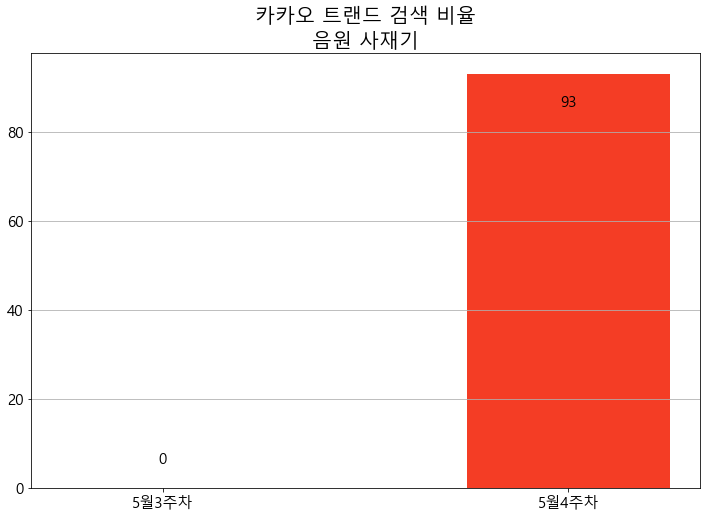

In [75]:
file_list = os.listdir(des3)
for one in file_list:
    if '음원 사재기.xls' in one:
        one_path = os.path.join(des3, one)
        temp = pd.read_excel(one_path).reset_index(drop=True)
        temp = temp.iloc[7:38, :].reset_index(drop=True)
        temp.columns = ['날짜', '검색비율']
        temp['날짜'] = temp['날짜'].astype(str)
        temp['날짜'] = temp['날짜'].apply([lambda x: x.split(' ')[0]])
        date_list = pd.date_range(end=start_date, periods=2, freq='W-MON')
        start_week = str(date_list[0]).split(' ')[0]
        end_week = str(date_list[-1]).split(' ')[0]
        week_temp = temp[ (temp['날짜'] >= start_week) & (temp['날짜'] <= end_week)].reset_index(drop=True)
        week_temp['검색비율'] = week_temp['검색비율'].astype(int)
        
        colors = sns.color_palette('YlOrRd', week_temp.shape[0])
        x = xticks_names2
        y = week_temp['검색비율']
        try:
            interval_ratio = math.ceil( max(y) )*0.05
            interval_ratio2 = math.ceil( max(y) )*0.2
            plt.figure( figsize=(12,8) )
            plt.grid(axis='y')
            plt.bar(x, y, color=colors, width=0.5)
            plt.title(f"카카오 트랜드 검색 비율\n{word}", fontsize=20)
            plt.xticks(xticks_names2, fontsize=15)
            plt.yticks(fontsize=15)
            for i in range( len(y) ):
                    if y[i] <= interval_ratio2:
                            plt.text(x[i], y[i]+interval_ratio, round(y[i],1), fontsize=15, color='black', horizontalalignment='center', verticalalignment='bottom')
                    else:
                            plt.text(x[i], y[i]-interval_ratio, round(y[i],1), fontsize=15, color='black', horizontalalignment='center', verticalalignment='top')
            file_name2 = f'{word}.png'
            save_img_path = os.path.join(des3, file_name2)
            plt.savefig(save_img_path)
            print(f'{file_name2} 저장 완료.')
        except:
            pass

# 코드 마지막